## MARBL diagnostics for vertical and horizontal nutrient distribution for ocean history files

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.image as mpimg

DEFINITIONS

v1: my first attempts at tuning (started from Jessica's namelist) (003)

v2: organize decreasing Imax,Km with size, then tuning from there (002)

v3: reassess based on Stock's parms, but making sure that each phyto has a main grazer (004)

Stock: Stock et al., 2014

In [3]:
zoos=[1,2,3,4]

### define total maximum ingestion rates

In [4]:
#004a branch
zoo1_maxI = 3.4
zoo2_maxI = 2.8
zoo3_maxI = 0.94
zoo4_maxI = 0.4
maxI_v1 = [zoo1_maxI, zoo2_maxI, zoo3_maxI, zoo4_maxI]

In [5]:
#004b branch
zoo1_maxI = 4.4
zoo2_maxI = 2.4
zoo3_maxI = 0.95
zoo4_maxI = 0.4
maxI_v2 = [zoo1_maxI, zoo2_maxI, zoo3_maxI, zoo4_maxI]

In [6]:
#004
zoo1_maxI = 4.6
zoo2_maxI = 2.6
zoo3_maxI = 0.82
zoo4_maxI = 0.3
maxI_v3 = [zoo1_maxI, zoo2_maxI, zoo3_maxI, zoo4_maxI]

In [7]:
#vals from Stock et al., 2014 SI
zoo1_maxI = 1.42
zoo2_maxI = 0.57
zoo3_maxI = 0.23
zoo4_maxI = 0.09
maxI_Stock=[zoo1_maxI, zoo2_maxI, zoo3_maxI, zoo4_maxI]

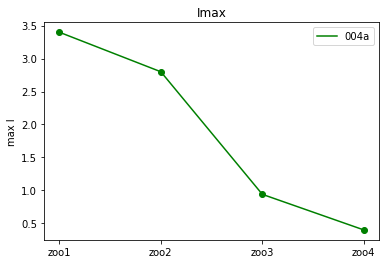

In [11]:
plt.plot(zoos,maxI_v1,label='004a',color='green')
plt.scatter(zoos,maxI_v1,color='green')
# plt.plot(zoos,maxI_v2,label='004b',color='red')
# plt.plot(zoos,maxI_v3,label='004',color='blue')
# plt.scatter(zoos,maxI_v3,color='blue')
plt.title('Imax')
# plt.plot(zoos,maxI_Stock,label='Stock',color='orange')
# plt.scatter(zoos,maxI_Stock,color='orange')
plt.ylabel('max I')
plt.legend()
plt.xticks([1, 2, 3, 4],
           ["zoo1", "zoo2", "zoo3", "zoo4"]);

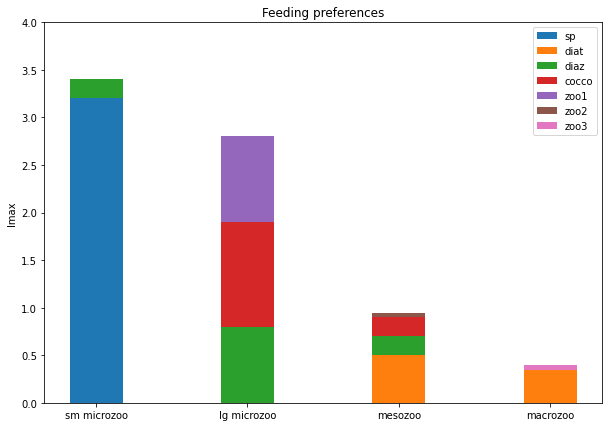

In [29]:
N = 4 # number of grazers

#grazees
sp = [3.2, 0, 0, 0]
diat = [0, 0, 0.5, 0.35]
diaz = [0.2, 0.8, 0.2, 0]
cocco = [0, 1.1, 0.2, 0]
zoo1 = [0,0.9,0,0]
zoo2 = [0,0,0.04,0]
zoo3 = [0,0,0,0.05]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bars2=np.add(sp, diat).tolist()
bars3=np.add(bars2, diaz).tolist()
bars4=np.add(bars3, cocco).tolist()
bars5=np.add(bars4, zoo1).tolist()
bars6=np.add(bars5, zoo2).tolist()

p1 = plt.bar(ind, sp, width)
p2 = plt.bar(ind, diat, width, bottom=sp)
p3 = plt.bar(ind, diaz, width, bottom=bars2)
p4 = plt.bar(ind, cocco, width, bottom=bars3)
p5 = plt.bar(ind, zoo1, width, bottom=bars4)
p6 = plt.bar(ind, zoo2, width, bottom=bars5)
p7 = plt.bar(ind, zoo3, width, bottom=bars6)

plt.rcParams["figure.figsize"] = (10,7)
plt.ylabel('Imax')
plt.title('Feeding preferences')
plt.xticks(ind, ('sm microzoo', 'lg microzoo', 'mesozoo', 'macrozoo'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('sp', 'diat', 'diaz', 'cocco','zoo1','zoo2','zoo3'))
plt.ylim(0,4);
#plt.show()

In [9]:
#004
zoo1_maxI = 2.6
zoo2_maxI = 1.1
zoo3_maxI = 0.4
zoo4_maxI = 0.2
maxI_v3 = [zoo1_maxI, zoo2_maxI, zoo3_maxI, zoo4_maxI]

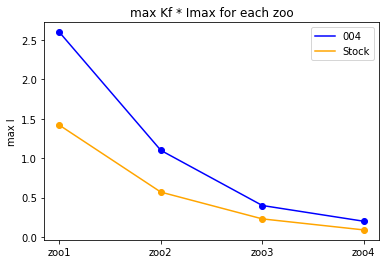

In [10]:
plt.plot(zoos,maxI_v3,label='004',color='blue')
plt.scatter(zoos,maxI_v3,color='blue')
plt.title('max Kf * Imax for each zoo')
plt.plot(zoos,maxI_Stock,label='Stock',color='orange')
plt.scatter(zoos,maxI_Stock,color='orange')
plt.ylabel('max I')
plt.legend()
plt.xticks([1, 2, 3, 4],
           ["zoo1", "zoo2", "zoo3", "zoo4"]);

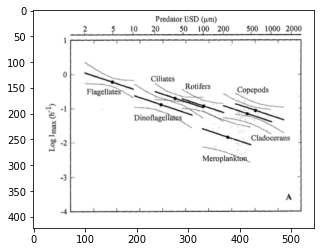

In [8]:
img = mpimg.imread('/glade/u/home/kristenk/adding_zooplankton/MARBL_4p4z/images/Hansen_Imax_Zoosize.png')
plt.imshow(img);

### Half saturation constants

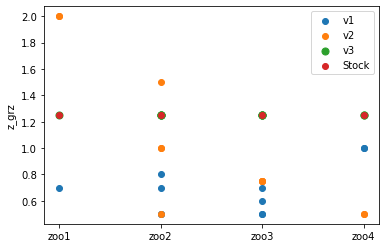

In [9]:
plt.scatter([1, 2,2,2,2, 3,3,3,3, 4,4],[0.7, 0.8,0.7,0.5,0.5, 0.5,0.7,0.6,0.5, 1,1],label='v1')
plt.scatter([1,1, 2,2,2,2, 3,3,3,3, 4,4],[2,2, 1.5,0.5,1,1, 0.75,0.75,0.75,0.75, 0.5,0.5],label='v2')
plt.scatter([1, 2,2,2,2, 3,3,3,3, 4,4],[1.25, 1.25,1.25,1.25,1.25, 1.25,1.25,1.25,1.25, 1.25,1.25],s=50,label='v3')
plt.scatter(zoos,[1.25,1.25,1.25,1.25],label='Stock')
plt.ylabel('z_grz')
plt.legend()
plt.xticks([1, 2, 3, 4],
           ["zoo1", "zoo2", "zoo3", "zoo4"]);

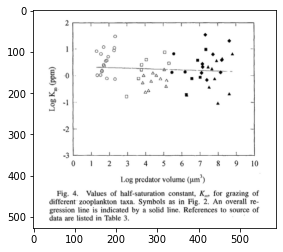

In [10]:
img = mpimg.imread('/glade/u/home/kristenk/adding_zooplankton/MARBL_4p4z/images/Hansen_Km_zooSize.png')
plt.imshow(img);